#Imports

In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import matplotlib.pyplot as plt
import pickle
import cv2

#Data

In [45]:
num_classes = 10 #airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
input_shape = (32, 32, 3) #width 32, height 32

In [54]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


#Plot

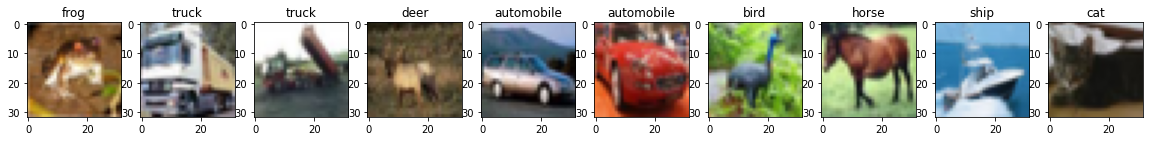

In [56]:
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  ax[i].imshow(x_train[i])
  ax[i].set_title(f'{classes[y_train[i][0]]}')

#Prepare Data

In [49]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [57]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [51]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [58]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [59]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [60]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#Model

In [61]:
model = keras.Sequential(
    [
      Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu", input_shape=input_shape),
      BatchNormalization(),

      Conv2D(32, kernel_size=(3, 3), padding ='same', activation="relu"),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
      Dropout(0.2),

      Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
     
      Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
      Dropout(0.2),
     
      Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
     
      Conv2D(128, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Flatten(),
      Dense(256, activation="relu"),
      Dropout(0.3),
     
      Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [62]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 18s 21ms/step - loss: 1.6059 - accuracy: 0.4359 - val_loss: 2.8392 - val_accuracy: 0.1319
Epoch 2/20
274/274 [==============================] - 5s 18ms/step - loss: 1.1545 - accuracy: 0.5853 - val_loss: 1.2399 - val_accuracy: 0.5639
Epoch 3/20
274/274 [==============================] - 5s 17ms/step - loss: 0.9669 - accuracy: 0.6573 - val_loss: 0.8580 - val_accuracy: 0.6992
Epoch 4/20
274/274 [==============================] - 5s 17ms/step - loss: 0.8301 - accuracy: 0.7077 - val_loss: 0.7790 - val_accuracy: 0.7295
Epoch 5/20
274/274 [==============================] - 5s 17ms/step - loss: 0.7339 - accuracy: 0.7408 - val_loss: 0.7269 - val_accuracy: 0.7473
Epoch 6/20
274/274 [==============================] - 5s 17ms/step - loss: 0.6514 - accuracy: 0.7713 - val_loss: 0.7348 - val_accuracy: 0.7535
Epoch 7/20
274/274 [==============================] - 5s 17ms/step - loss: 0.5852 - accuracy: 0.7957 - val_loss: 0.8365 - val_accuracy: 0.726

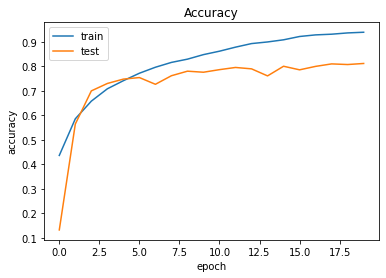

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

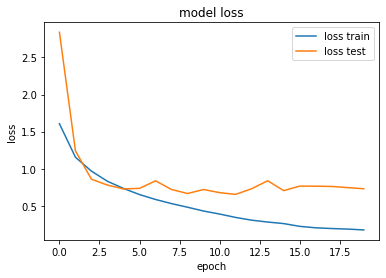

In [67]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss test'])
plt.show()

In [68]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7854147553443909
Test accuracy: 0.8022000193595886


#Metrics

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [70]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [71]:
predict = model.predict(x_test)

In [72]:
predict

array([[2.62151734e-04, 4.02504520e-05, 9.89810214e-05, ...,
        4.97312385e-06, 1.50213935e-04, 6.13647717e-05],
       [3.90191914e-08, 3.88516355e-07, 1.25555600e-19, ...,
        7.09681106e-19, 9.99999523e-01, 1.33712999e-10],
       [1.12954215e-08, 1.46551145e-07, 6.26722008e-11, ...,
        7.52762002e-12, 9.99999881e-01, 2.57529464e-09],
       ...,
       [1.64559283e-10, 1.04864962e-13, 2.27872297e-05, ...,
        3.11432705e-05, 7.63031915e-10, 3.29220722e-12],
       [2.68493591e-06, 9.99985218e-01, 3.79196592e-07, ...,
        1.26737376e-07, 7.15987696e-08, 1.12644648e-05],
       [3.70651427e-17, 4.43664945e-21, 2.73876291e-17, ...,
        1.00000000e+00, 1.54309092e-24, 5.09111088e-20]], dtype=float32)

In [76]:
predict_classes = np.argmax(predict, axis=1)

In [77]:
predict_classes

array([3, 8, 8, ..., 5, 1, 7])

##Accuracy

In [79]:
print(accuracy_score(np.argmax(y_test, axis=1), predict_classes))

0.8022


##Confusion Matrix

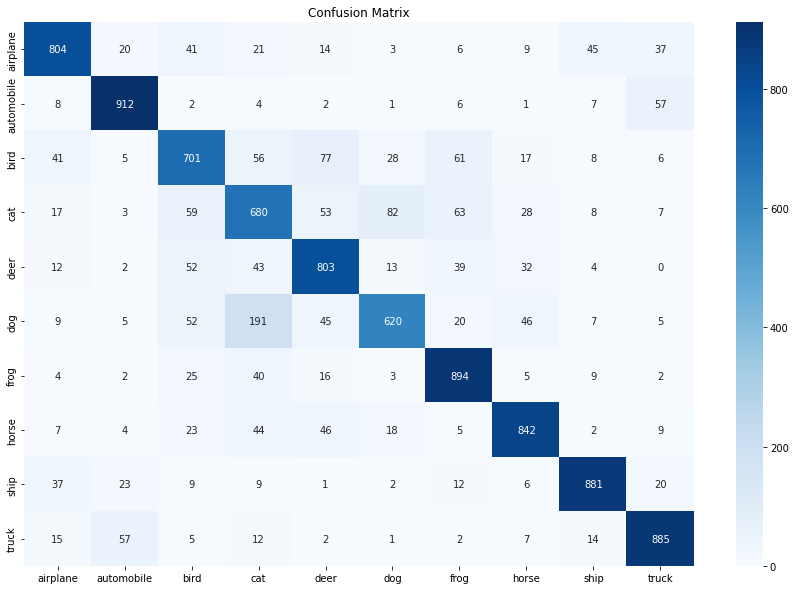

In [81]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    confusion_matrix(
        np.argmax(y_test, axis=1), 
        predict_classes), 
    annot=True, 
    fmt='d', 
    ax=ax, 
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes)
ax.set_title('Confusion Matrix');

In [82]:
pickle.dump(model, open('/content/drive/MyDrive/Artificial Intelligence/CIFAR 10/model.pkl', mode='wb'))

INFO:tensorflow:Assets written to: ram://63e660d5-7447-4f56-80d2-067a946da86d/assets
